In [3]:
from scipy import stats as st
from scipy.stats import chisquare
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import plotly.figure_factory as ff

In [4]:
survey_raw = pd.read_csv("Raw_survey_data.csv")
survey_raw["dummy"] = [1]*1600
survey_raw = survey_raw.rename(columns = {'q4':'LOIF','q5':'LOTM','q8':'LOIT','q17':'House_Status','q18':'Household_Status','q19':'Grocery_Budget_Strictness'},errors="raise")
cNames = list(survey_raw.columns.values)
checkList = ['Prefecture_code','TypeOfRes','Sex','Age','Age_Catagory','Sex_Era','Married','Profession','House_Status','Household_Status','Grocery_Budget_Strictness']
cur_pivot = survey_raw.pivot_table("dummy",index = "LOTM",columns = 'Grocery_Budget_Strictness',aggfunc = sum)
cur_pivot = cur_pivot.fillna(0)
cur_pivot



Grocery_Budget_Strictness,1,2,3,4,5,6
LOTM,,,,,,
1,17,71,71,84,25,206
2,11,105,79,115,20,108
3,12,64,84,67,10,88
4,17,87,42,85,17,62
5,5,16,12,13,1,6


In [5]:
#---------------------------------------------------------------------------------------#
#Init variable to hold all Chi2 Data for final merge                                    #  
#---------------------------------------------------------------------------------------#
allSigP = []
allSigAttr = []


In [6]:
#--------------------------------------------------------------------#
#LOIM Chi2 on All catagory freq                                      #  
#--------------------------------------------------------------------#
sigP = []
sigAttr = []
expected = []
dof = []
for column in checkList:
    cur_pivot = survey_raw.pivot_table("dummy",index = "LOTM",columns =  column,aggfunc = sum)
    cur_pivot = cur_pivot.fillna(0)
    chi2,p,dof_,expected_ = st.chi2_contingency(cur_pivot)
#     if p<0.05:
    allSigAttr.append(column)
    sigP.append(p)
    expected.append(expected_)
    dof.append(dof_)
    
allSigP.append(sigP)

# ColumnsOfInterest = {'Attribute':sigAttr,'P-Value':sigP,'Dof':dof}
# ColumnsOfInterestD = pd.DataFrame(data=ColumnsOfInterest)
# ColumnsOfInterestD = ColumnsOfInterestD.style.applymap(color_sig_red)
# ColumnsOfInterestD

In [7]:
#--------------------------------------------------------------------#
#LOIT Chi2 on All catagory freq                                      #  
#--------------------------------------------------------------------#
sigP = []
sigAttr = []
expected = []
dof = []
for column in checkList:
    cur_pivot = survey_raw.pivot_table("dummy",index = "LOIT",columns =  column,aggfunc = sum)
    cur_pivot = cur_pivot.fillna(0)
    chi2,p,dof_,expected_ = st.chi2_contingency(cur_pivot)
#     if p<0.05:
#     sigAttr.append(column)
    sigP.append(p)
    expected.append(expected_)
    dof.append(dof_)
    
allSigP.append(sigP)
# ColumnsOfInterest = {'Attribute':sigAttr,'P-Value':sigP,'Dof':dof}
# ColumnsOfInterestD = pd.DataFrame(data=ColumnsOfInterest)
# ColumnsOfInterestD = ColumnsOfInterestD.style.applymap(color_sig_red)
# ColumnsOfInterestD

In [8]:
#--------------------------------------------------------------------#
#LOIT Chi2 on All catagory freq             TO BE USED IN PAPER                         #  
#--------------------------------------------------------------------#
sigP = []
sigAttr = []
expected = []
dof = []
for column in checkList:
    cur_pivot = survey_raw.pivot_table("dummy",index = "LOIT",columns =  column,aggfunc = sum)
    cur_pivot = cur_pivot.fillna(0)
    chi2,p,dof_,expected_ = st.chi2_contingency(cur_pivot)
#     if p<0.05:
    sigAttr.append(column)
    sigP.append(p)
    expected.append(expected_)
    dof.append(dof_)
print(sigP)
# allSigP.append(sigP)
# ColumnsOfInterest = {'Attribute':sigAttr,'P-Value':sigP,'Dof':dof}
# ColumnsOfInterestD = pd.DataFrame(data=ColumnsOfInterest)
# ColumnsOfInterestD = ColumnsOfInterestD.style.applymap(color_sig_red)
# ColumnsOfInterestD

[0.21193449505630532, 1.0, 0.08645187767185347, 0.0003156948060190063, 4.410849562444919e-05, 4.631839523259801e-05, 0.7119458238288405, 0.021156581955447368, 0.7610940698861538, 0.5089697190547111, 7.984395533552126e-17]


In [9]:
#--------------------------------------------------------------------#
#LOIM Chi2 on All catagory freq       To be USED IN PAPER                               #  
#--------------------------------------------------------------------#
sigP = []
sigAttr = []
expected = []
dof = []
for column in checkList:
    cur_pivot = survey_raw.pivot_table("dummy",index = "LOTM",columns =  column,aggfunc = sum)
    cur_pivot = cur_pivot.fillna(0)
    chi2,p,dof_,expected_ = st.chi2_contingency(cur_pivot)
#     if p<0.05:
    sigAttr.append(column)
    sigP.append(p)
    expected.append(expected_)
    dof.append(dof_)

print(sigP)
# allSigP.append(sigP)
# ColumnsOfInterest = {'Attribute':sigAttr,'P-Value':sigP,'Dof':dof}
# ColumnsOfInterestD = pd.DataFrame(data=ColumnsOfInterest)
# ColumnsOfInterestD = ColumnsOfInterestD.style.applymap(color_sig_red)
# ColumnsOfInterestD

[0.2006193335477526, 1.0, 0.34643618198090753, 0.031537138415041396, 0.002818423520104516, 0.009914045833213429, 0.8661910461770062, 0.03254417196748648, 0.6725635959069769, 0.7498666040416542, 1.163895254353338e-14]


In [10]:
#--------------------------------------------------------------------#
#LOIF Chi2 on All catagory freq       To be USED IN PAPER                               #  
#--------------------------------------------------------------------#
sigP = []
sigAttr = []
expected = []
dof = []
for column in checkList:
    cur_pivot = survey_raw.pivot_table("dummy",index = "LOIF",columns =  column,aggfunc = sum)
    cur_pivot = cur_pivot.fillna(0)
    chi2,p,dof_,expected_ = st.chi2_contingency(cur_pivot)
#     if p<0.05:
    sigAttr.append(column)
    sigP.append(p)
    expected.append(expected_)
    dof.append(dof_)

print(sigP)
# allSigP.append(sigP)
# ColumnsOfInterest = {'Attribute':sigAttr,'P-Value':sigP,'Dof':dof}
# ColumnsOfInterestD = pd.DataFrame(data=ColumnsOfInterest)
# ColumnsOfInterestD = ColumnsOfInterestD.style.applymap(color_sig_red)
# ColumnsOfInterestD

[0.048014712726616296, 1.0, 0.027835704873076867, 0.9270068505615348, 0.2079777714026188, 0.13412322293867188, 0.208685296558332, 0.06057826549200538, 0.0509714607293027, 0.09006797535179788, 2.231669477150967e-07]


In [11]:
#-------------------------------------------------------------------------------------------#
#LOIF Chi2 on All catagory freq                                       #  
#-------------------------------------------------------------------------------------------#

# Columns = ["LOIM","LOIT","LOIF"]

# def color_sig_red(val):
#     color = 'red' if (isinstance(val, float) and val < 0.05) else 'black'
#     return 'color: %s' % color

# ColumnsOfInterest = {'Attribute':Columns,'P-Value':allSigP}
# ColumnsOfInterestD = pd.DataFrame(data=allSigP,index = Columns,columns = allSigAttr)
# ColumnsOfInterestD = ColumnsOfInterestD.style.applymap(color_sig_red)

# fig =  ff.create_table(ColumnsOfInterestD)
# fig.update_layout(
#     autosize=False,
#     width=2200,
#     height=200,
# )
# fig.write_image("table_plotly.png", scale=2)
# fig.show()

F_onewayResult(statistic=3.3484844950560966, pvalue=0.00970172043833915)


/Users/Bofan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/sandbox/stats/multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,-0.222,0.9,-2.6625,2.2184,False
1,3,-0.6657,0.9,-3.1513,1.8199,False
1,4,-1.1725,0.716,-3.8085,1.4634,False
1,5,-7.1595,0.0039,-12.6972,-1.6218,True
2,3,-0.4437,0.9,-2.9937,2.1063,False
2,4,-0.9505,0.859,-3.6473,1.7463,False
2,5,-6.9374,0.0061,-12.5044,-1.3705,True
3,4,-0.5068,0.9,-3.2446,2.2309,False
3,5,-6.4938,0.0133,-12.0806,-0.9069,True
4,5,-5.987,0.0318,-11.6423,-0.3316,True


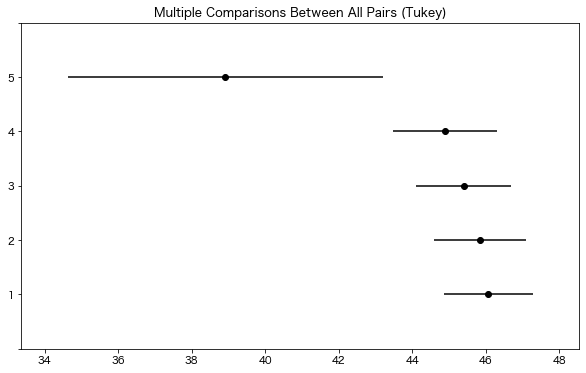

In [12]:
#--------------------------------------------------------------------------------#
#ANOVA ON Age and LOIT                                                           #  
#--------------------------------------------------------------------------------#
age_and_loit = survey_raw[{"LOIT","Age"}]
group_by_age = age_and_loit.groupby("LOIT")
groups = []
lotmlabel = []
ages = []

for i in range(1,6):
    for each in group_by_age.get_group(i)["Age"]:
        ages.append(each)
        lotmlabel.append(i)
    groups.append(group_by_age.get_group(i)["Age"])

print(st.f_oneway(*groups))

#Graph
# fig, ax = plt.subplots(figsize = (5,8))
# ax.bar(labels,Grocery_Budget_Strictness_LOTM_freq.loc[1],width = 0.65,label = "1")

#Post-HOC

tukey = pairwise_tukeyhsd(endog = ages,
                        groups = lotmlabel,
                         alpha = 0.05)

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=60,ymin=-0.5,ymax=4.5, color="red")
plt

tukey.summary()
# print("1 mean:"+str(group_by_age.get_group(1)["Age"].mean()))
# print("4 mean:"+str(group_by_age.get_group(4)["Age"].mean()))


F_onewayResult(statistic=1.2752895522191952, pvalue=0.27756749003677844)


group1,group2,meandiff,p-adj,lower,upper,reject
1,2,1.0671,0.7869,-1.607,3.7411,False
1,3,-0.6458,0.9,-3.568,2.2765,False
1,4,0.288,0.9,-2.2631,2.839,False
1,5,2.2083,0.554,-1.811,6.2277,False
2,3,-1.7128,0.4586,-4.5251,1.0995,False
2,4,-0.7791,0.9,-3.2035,1.6453,False
2,5,1.1413,0.9,-2.7988,5.0814,False
3,4,0.9337,0.8684,-1.7619,3.6294,False
3,5,2.8541,0.3202,-1.2585,6.9667,False
4,5,1.9204,0.6339,-1.9373,5.7781,False


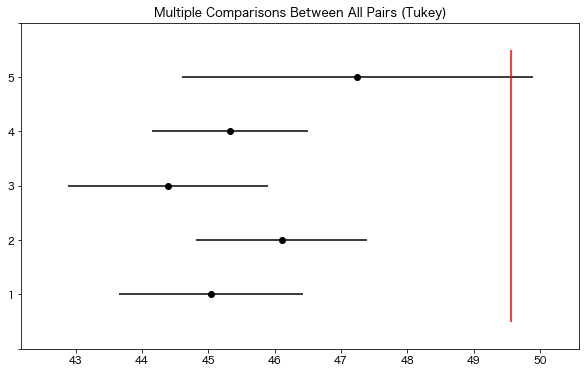

In [13]:
#--------------------------------------------------------------------------------#
#ANOVA ON Age and LOIF                                                           #  
#--------------------------------------------------------------------------------#
age_and_loit = survey_raw[{"LOIF","Age"}]
group_by_age = age_and_loit.groupby("LOIF")
groups = []
lotmlabel = []
ages = []

for i in range(1,6):
    for each in group_by_age.get_group(i)["Age"]:
        ages.append(each)
        lotmlabel.append(i)
    groups.append(group_by_age.get_group(i)["Age"])

print(st.f_oneway(*groups))

#Graph
# fig, ax = plt.subplots(figsize = (5,8))
# ax.bar(labels,Grocery_Budget_Strictness_LOTM_freq.loc[1],width = 0.65,label = "1")

#Post-HOC

tukey = pairwise_tukeyhsd(endog = ages,
                        groups = lotmlabel,
                         alpha = 0.05)

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()
# print("1 mean:"+str(group_by_age.get_group(1)["Age"].mean()))
# print("4 mean:"+str(group_by_age.get_group(4)["Age"].mean()))



In [14]:
#--------------------------------------------------------------------#
#LOIT Chi2 on Age catagory freq                                      #  
#--------------------------------------------------------------------#
sigP = []
sigAttr = []
for column in checkList:
    cur_pivot = survey_raw.pivot_table("dummy",index = "LOIT",columns =  column,aggfunc = sum)
    chi2,p,dof,expected = st.chi2_contingency(cur_pivot)
    if p<0.05:
        sigAttr.append(column)
        sigP.append(p)
ColumnsOfInterest = {'Attribute':sigAttr,'P-Value':sigP}
ColumnsOfInterestD = pd.DataFrame(data=ColumnsOfInterest)
# ColumnsOfInterestD

In [15]:
#--------------------------------------------------------------------#
#LOIF Chi2 on Age catagory freq                                      #  
#--------------------------------------------------------------------#
sigP = []
sigAttr = []
for column in checkList:
    cur_pivot = survey_raw.pivot_table("dummy",index = "LOIF",columns =  column,aggfunc = sum)
    chi2,p,dof,expected = st.chi2_contingency(cur_pivot)
    if p<0.05:
        sigAttr.append(column)
        sigP.append(p)
ColumnsOfInterest = {'Attribute':sigAttr,'P-Value':sigP}
ColumnsOfInterestD = pd.DataFrame(data=ColumnsOfInterest)
# ColumnsOfInterestD

In [16]:
#---------------------------------------------------------------------#
#LOIM :Process the Age_Catagory                                       #  
#---------------------------------------------------------------------#
#Test Anova on frequency 
#Test Anova on ratio
#Perform linear regression 


In [17]:
#----------------------------------------------------------------------#
#LOIM : Anova on Age catagory freq                                     #  
#----------------------------------------------------------------------#
Age_Catagory_LOTM = survey_raw.pivot_table("dummy",index = "LOTM",columns = "Age_Catagory" ,aggfunc = sum)

#Catagory total 
Age_Catagory_LOTM_total = survey_raw.groupby("Age_Catagory").count()
Age_Catagory_LOTM_total = Age_Catagory_LOTM_total["dummy"]
# print(Age_Catagory_LOTM_total)

#Category frequency
Age_Catagory_LOTM_freq = Age_Catagory_LOTM/Age_Catagory_LOTM_total
# print(Age_Catagory_LOTM_freq.loc[1])

#Standard Deviation
age_category_std = np.std(Age_Catagory_LOTM_freq)
# print(age_category_std)

# ANOVA  #
allTypes = []
range_ = [i for i in range(2,7)]
for i in range_:
    allTypes.append(Age_Catagory_LOTM[i])
print(allTypes)
print(st.f_oneway(*allTypes)) 

#------Graph------# 
labels = ["2","3","4","5","6"]
# fig, ax = plt.subplots(figsize = (10,12))
# ax.bar(labels,Age_Catagory_LOTM_freq.loc[1],width = 0.65,label = "1")
# pre = 0
# for i in range(2,6): 
#     pre = pre+Age_Catagory_LOTM_freq.loc[i-1]
#     ax.bar(labels,Age_Catagory_LOTM_freq.loc[i],width = 0.65,bottom=pre,label = str(i))
# ax.set_ylabel("LOIM Percentage")
# ax.set_title("Distribution of LOIM in different Age_Catagory")
# ax.legend()
# plt.show()

[LOTM
1    57
2    76
3    53
4    75
5    14
Name: 2, dtype: int64, LOTM
1    107
2     80
3     58
4     52
5     13
Name: 3, dtype: int64, LOTM
1    112
2    104
3     84
4     85
5     11
Name: 4, dtype: int64, LOTM
1    109
2     99
3     75
4     45
5      8
Name: 5, dtype: int64, LOTM
1    89
2    79
3    55
4    53
5     7
Name: 6, dtype: int64]
F_onewayResult(statistic=0.38662597204409305, pvalue=0.8156281611429794)


In [18]:
#---------------------------------------------------------------#
#Anova on Age catagory probability                              #  
#---------------------------------------------------------------#
Age_Catagory_total = survey_raw.groupby("Age_Catagory").sum()
total = Age_Catagory_total["dummy"]

print(total)
Age_Catagory_LOTM_Freq = Age_Catagory_LOTM/total
allTypes = []
for i in range(2,7):
    allTypes.append(Age_Catagory_LOTM_Freq[i].mean())
print(allTypes)
st.f_oneway(*allTypes)


Age_Catagory
2    275
3    310
4    396
5    336
6    283
Name: dummy, dtype: int64
[0.2, 0.2, 0.2, 0.2, 0.2]


ValueError: zero-dimensional arrays cannot be concatenated

F_onewayResult(statistic=2.9238104124732858, pvalue=0.06582565597159273)
P Value: 0.06582565597159273


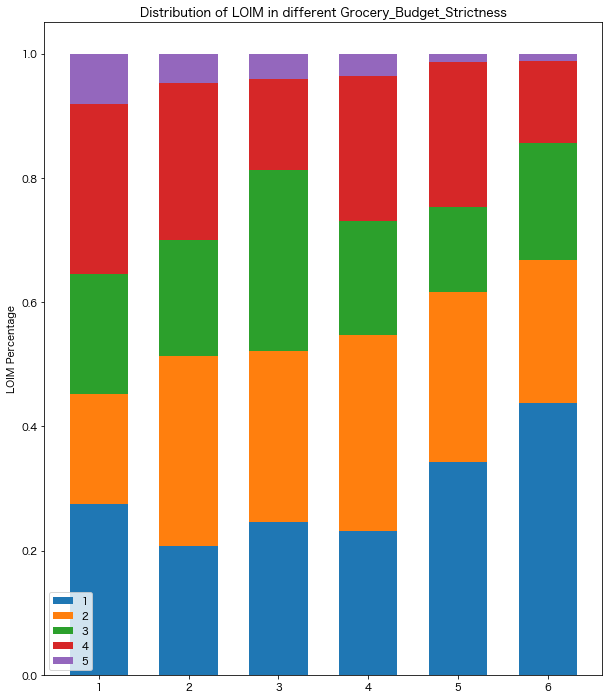

In [20]:
#------------------------------------------------------------------------#
#Anova on Grocery_Budget_Strictness frequenct                            #  
#------------------------------------------------------------------------#
Grocery_Budget_Strictness_LOTM = survey_raw.pivot_table("dummy",index = "LOTM",columns = "Grocery_Budget_Strictness" ,aggfunc = sum)

#Get total for each strictness level
Grocery_Budget_Strictness_total = survey_raw.groupby("Grocery_Budget_Strictness").sum()
total = Grocery_Budget_Strictness_total["dummy"]
allTypes = []
range_ = [i for i in range(1,7)]
for i in range_:
    if i != 1 and i != 4:
        allTypes.append(Grocery_Budget_Strictness_LOTM[i])
sta, p = st.f_oneway(*allTypes)
print(st.f_oneway(*allTypes))
print("P Value:",p)



#------Graph------#
Grocery_Budget_Strictness_LOTM_freq = Grocery_Budget_Strictness_LOTM/total
labels = ["1","2","3","4","5","6"]
fig, ax = plt.subplots(figsize = (10,12))
ax.bar(labels,Grocery_Budget_Strictness_LOTM_freq.loc[1],width = 0.65,label = "1")
pre = 0
for i in range(2,6): 
    pre = pre+Grocery_Budget_Strictness_LOTM_freq.loc[i-1]
    ax.bar(labels,Grocery_Budget_Strictness_LOTM_freq.loc[i],width = 0.65,bottom=pre,label = str(i))
ax.set_ylabel("LOIM Percentage")
ax.set_title("Distribution of LOIM in different Grocery_Budget_Strictness")
ax.legend()
plt.show()



F_onewayResult(statistic=12.02224577710737, pvalue=3.698645708553643e-08)
F_onewayResult(statistic=7.9235709022002325, pvalue=0.0064032980651977794)


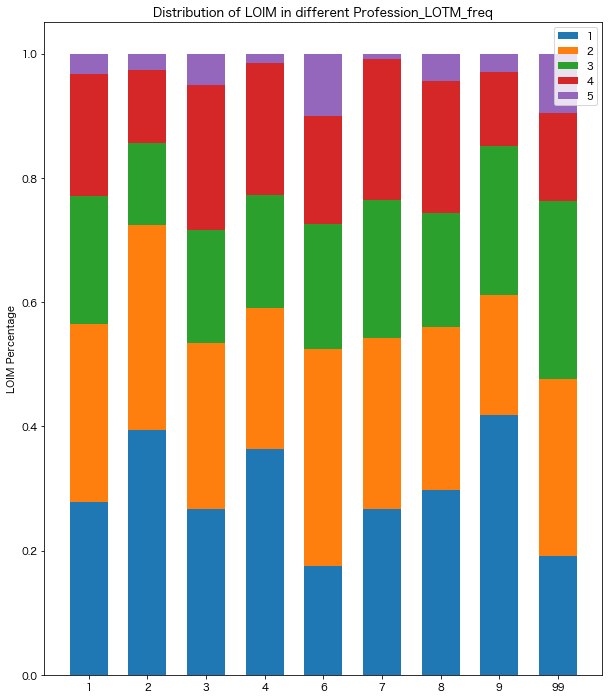

In [21]:
#---------------------------------------------------------------#
#Anova on Profession                                            #  
#---------------------------------------------------------------#
Profession_LOTM = survey_raw.pivot_table("dummy",index = "LOTM",columns = "Profession" ,aggfunc = sum)

#Get total for each strictness level
Profession_total = survey_raw.groupby("Profession").sum()
total = Profession_total["dummy"]

#Perform ANOVA
allTypes = []
range_ = [i for i in range(1,10) if i!=5]
range_.append(99)
for i in range_:
    allTypes.append(Profession_LOTM[i])
# st.f_oneway(*allTypes)
sta, p = st.f_oneway(allTypes[6],allTypes[7],allTypes[8])
print(st.f_oneway(*allTypes))
print(st.f_oneway(allTypes[6],allTypes[7],allTypes[8]))

#------Graph------#
Profession_LOTM_freq = Profession_LOTM/total
Profession_LOTM_freq.loc[1]
labels = ["1", "2", "3", "4", "6", "7", "8", "9", "99"]
fig, ax = plt.subplots(figsize = (10,12))
ax.bar(labels, Profession_LOTM_freq.loc[1],width = 0.65,label = "1")
pre = 0
for i in range(2,6): 
    pre = pre+Profession_LOTM_freq.loc[i-1] 
    ax.bar(labels,Profession_LOTM_freq.loc[i],width = 0.65,bottom=pre,label = str(i))
ax.set_ylabel("LOIM Percentage")
ax.set_title("Distribution of LOIM in different Profession_LOTM_freq")
ax.legend()
plt.show()

In [19]:
#---------------------------------------------------------------#
#Anova on Profession                                            #  
#---------------------------------------------------------------#
Profession_LOTM = survey_raw.pivot_table("dummy",index = "LOTM",columns = "Profession" ,aggfunc = sum)

#Get total for each strictness level
Profession_total = survey_raw.groupby("Profession").sum()
total = Profession_total["dummy"]

#Perform ANOVA
allTypes = []
range_ = [i for i in range(1,10) if i!=5]
range_.append(99)
for i in range_:
    allTypes.append(Profession_LOTM[i])
# st.f_oneway(*allTypes)
sta, p = st.f_oneway(allTypes[6],allTypes[7],allTypes[8])
# print(st.f_oneway(*allTypes))
# print(st.f_oneway(allTypes[6],allTypes[7],allTypes[8]))
Profession_LOTM_freq.loc[1]
#------Graph------#
# Profession_LOTM_freq = Profession_LOTM/total
# labels = ["1", "2", "3", "4", "6", "7", "8", "9", "99"]
# fig, ax = plt.subplots(figsize = (10,12))
# ax.bar(labels, Profession_LOTM_freq.loc[1],width = 0.65,label = "1")
# pre = 0
# for i in range(2,6): 
#     pre = pre+Profession_LOTM_freq.loc[i-1] 
#     ax.bar(labels,Profession_LOTM_freq.loc[i],width = 0.65,bottom=pre,label = str(i))
# ax.set_ylabel("LOIM Percentage")
# ax.set_title("Distribution of LOIM in different Profession_LOTM_freq")
# ax.legend()
# plt.show()

Profession
1     0.278464
2     0.394737
3     0.266667
4     0.363636
6     0.175000
7     0.266376
8     0.297959
9     0.417910
99    0.190476
Name: 1, dtype: float64

In [23]:
#---------------------------------------------------------------#
#Anova on Age                                                   #  
#---------------------------------------------------------------#
Age_Catagory_total = survey_raw.groupby("Age").sum()
total = Age_Catagory_total["dummy"]

Age_Catagory_LOTM_Freq = Age_Catagory_LOTM/total
allTypes = []
for i in range(2,7):
    allTypes.append(Age_Catagory_LOTM_Freq[i].mean())
# print(allTypes)
# st.f_oneway(*allTypes)


[nan, nan, nan, nan, nan]


ValueError: zero-dimensional arrays cannot be concatenated